# Logistic Regression on Indian Diabetes Data

In [1]:
import pandas as pd
import scipy as sc
import sklearn as sl
import pickle as pk
import csv
import numpy as np
import matplotlib.pyplot as mat
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

/home/mohita/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv('pima_indian_diabetes.csv')
df.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [3]:
features=df[['No_Times_Pregnant','Plasma_Glucose','Diastolic_BP','Triceps','Insulin','BMI','Age']]
features.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
0,1,89,66,23,94,28.1,21
1,0,137,40,35,168,43.1,33
2,3,78,50,32,88,31.0,26
3,2,197,70,45,543,30.5,53
4,1,189,60,23,846,30.1,59


# Data Exploration and Data Visualization

In [4]:
df.isnull().values.any()

False

In [5]:
df.Diabetes.value_counts()

0    262
1    130
Name: Diabetes, dtype: int64

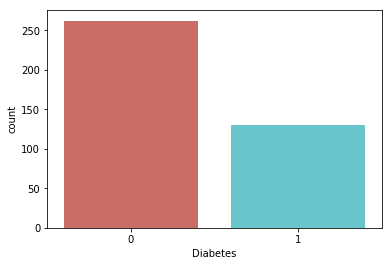

In [6]:
sns.countplot(x='Diabetes',data=df,palette='hls')
mat.show()
mat.savefig('count_plot')

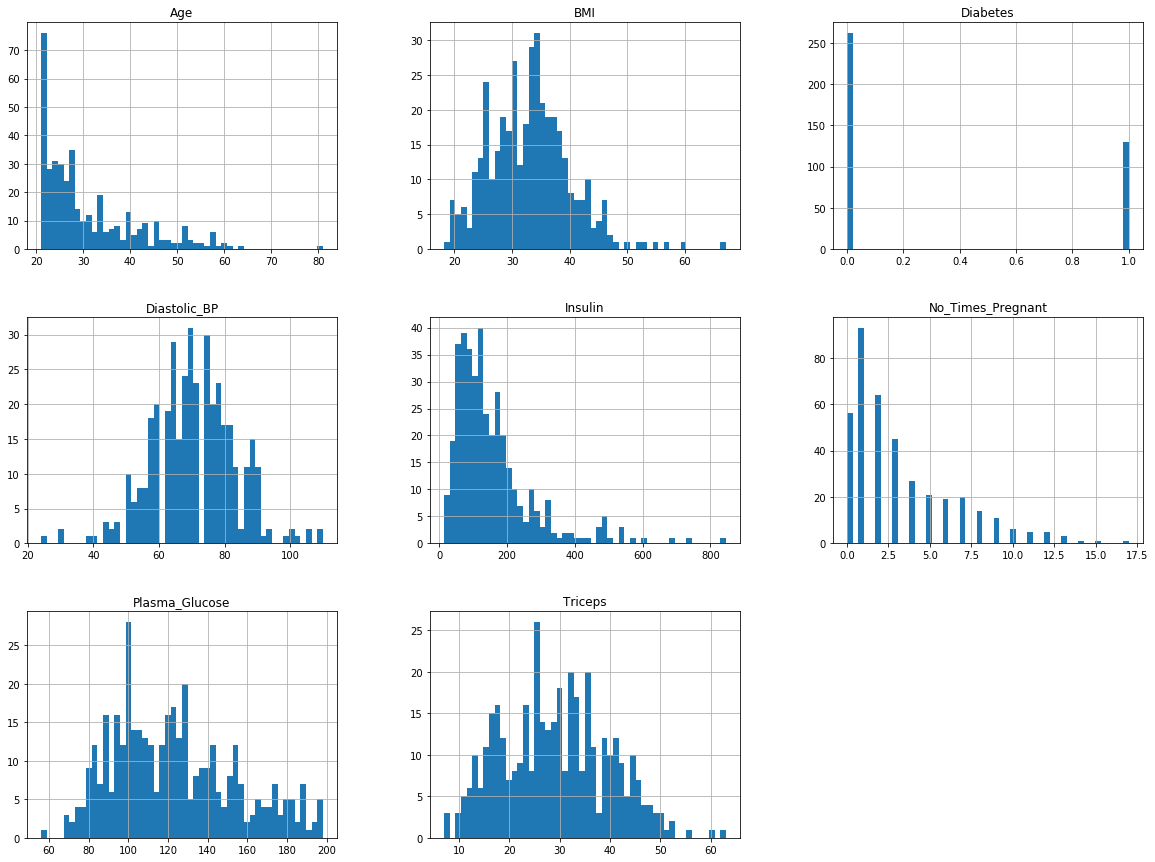

In [7]:
df.hist(bins=50,figsize=(20,15))
mat.show()

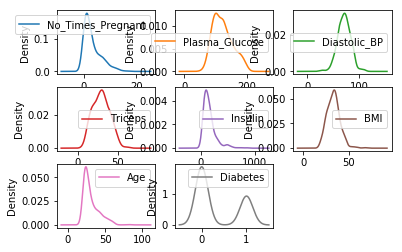

In [8]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
mat.show()

NameError: name 'plt' is not defined

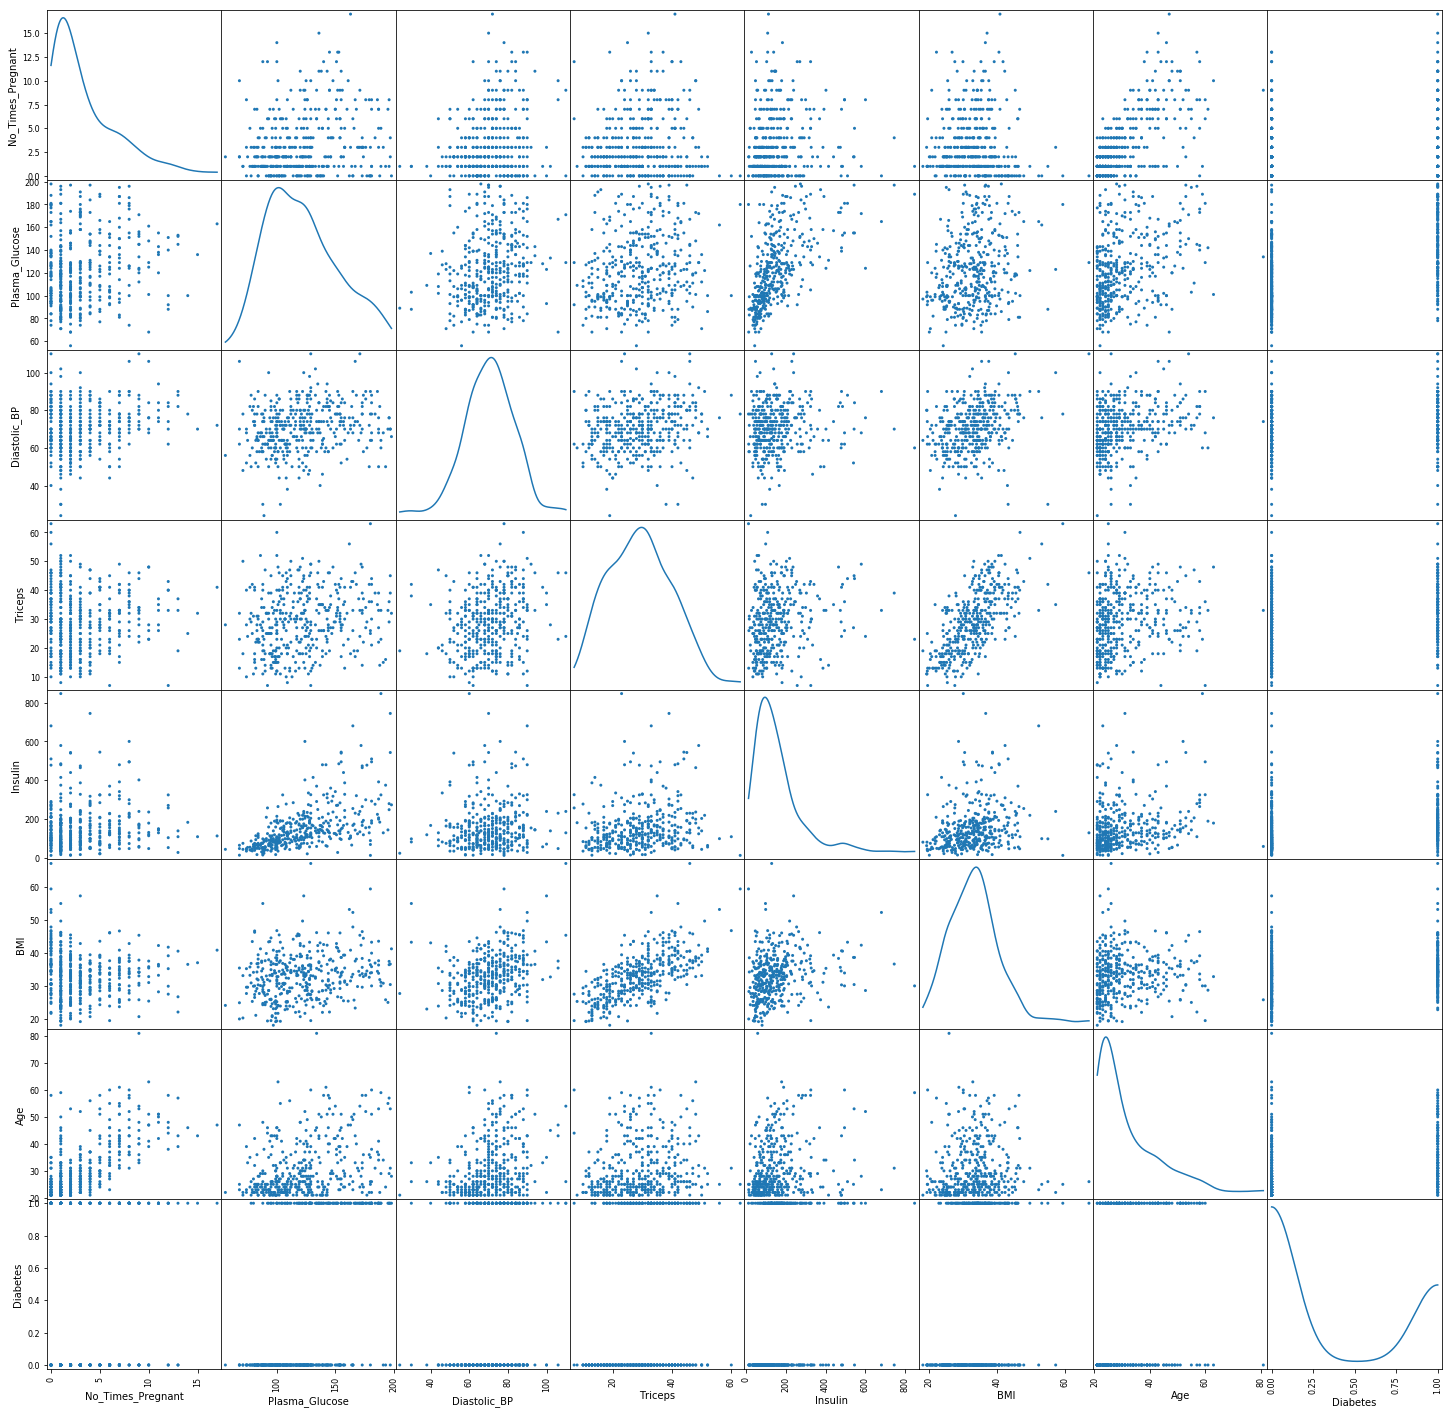

In [9]:
scatter_matrix(df
               ,alpha=1,figsize=(25,25),diagonal='kde')
plt.show()

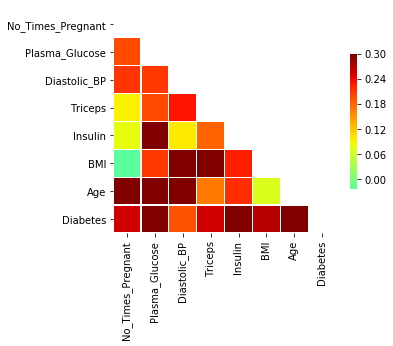

In [13]:
corr_mat=df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = mat.subplots(figsize=(5,5))

# Generate a custom diverging colormap
cmap = mat.get_cmap("jet")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

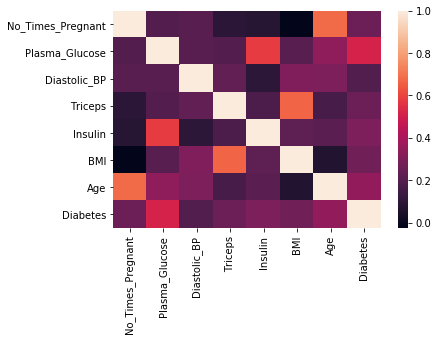

In [14]:
sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07ea5b74e0>,
      dtype=object)

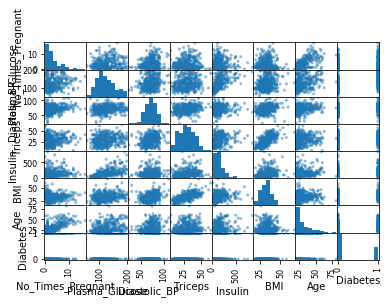

In [15]:
scatter_matrix(df)

In [16]:
corr_mat

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
No_Times_Pregnant,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.679608,0.256566
Plasma_Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.343641,0.515703
Diastolic_BP,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,0.300039,0.192673
Triceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.069814,0.270118
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,1.000000,0.350804
Diabetes,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.350804,1.000000


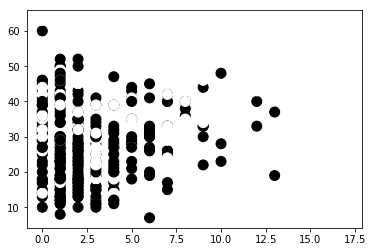

In [17]:
mat.scatter(df['No_Times_Pregnant'],df['Triceps'] , c=df['Diabetes'], s=100, cmap='gray')

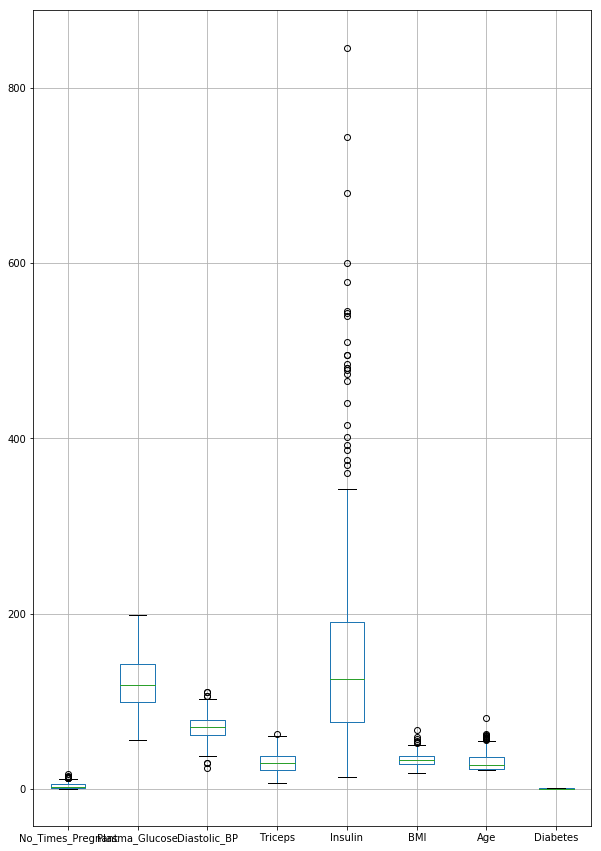

In [18]:
df.boxplot(figsize=(10,15))

In [19]:
df.groupby('Diabetes').mean()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
Diabetes,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,35.938462


# Data Normalization

In [20]:
minmax=MinMaxScaler()
df_norm=pd.DataFrame(minmax.fit_transform(df),columns=['No_Times_Pregnant','Plasma_Glucose','Diastolic_BP ','Triceps','Insulin','BMI','Age','Diabetes'])
df_norm.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.000000,0.0
1,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.200000,1.0
2,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.083333,1.0
3,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.533333,1.0
4,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.633333,1.0


# Removing multicorrelations using Variable Inflation Factors

In [21]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns
vif

,VIF Factor,features
0,3.814440,No_Times_Pregnant
1,24.569884,Plasma_Glucose
2,30.732425,Diastolic_BP
3,15.801804,Triceps
4,4.037006,Insulin
5,39.116767,BMI
6,20.709639,Age


In [22]:
def vif_calculate(X,threshold=5):
   dropped = True
   while dropped:
       variables = X.columns
       dropped=False
       vif = []
       new_vif = 0
       for var in X.columns:
           new_vif = variance_inflation_factor(X[variables].values, X.columns.get_loc(var))
           vif.append(new_vif)
           if np.isinf(new_vif):
               break
       max_vif = max(vif)
       if max_vif > threshold:
           maxloc = vif.index(max_vif)
           print('Dropping {X.columns[maxloc]} with vif={max_vif}')
           X = X.drop([X.columns.tolist()[maxloc]], axis=1)
           print(X.head())
           dropped=True
   return X

In [23]:
z = vif_calculate(features, 5)

Dropping {X.columns[maxloc]} with vif={max_vif}
   No_Times_Pregnant  Plasma_Glucose  Diastolic_BP  Triceps  Insulin  Age
0                  1              89            66       23       94   21
1                  0             137            40       35      168   33
2                  3              78            50       32       88   26
3                  2             197            70       45      543   53
4                  1             189            60       23      846   59
Dropping {X.columns[maxloc]} with vif={max_vif}
   No_Times_Pregnant  Diastolic_BP  Triceps  Insulin  Age
0                  1            66       23       94   21
1                  0            40       35      168   33
2                  3            50       32       88   26
3                  2            70       45      543   53
4                  1            60       23      846   59
Dropping {X.columns[maxloc]} with vif={max_vif}
   No_Times_Pregnant  Diastolic_BP  Triceps  Insulin
0          

# Model Training

In [24]:
shuffle_indices = np.random.permutation(len(df_norm))
test_size = int(len(shuffle_indices)*0.3)
test_size

117

In [25]:
test_indices =shuffle_indices[:test_size]
train_indices = shuffle_indices[test_size:]

In [26]:
test= df_norm.iloc[test_indices]

In [27]:
train = df_norm.iloc[train_indices]

In [28]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(train.drop('Diabetes',axis=1),train['Diabetes'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
predictions=logistic_model.predict(test.drop('Diabetes',axis=1))
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.])

# Performance of Model

In [30]:
cm=confusion_matrix(test['Diabetes'],predictions)
cm

array([[76,  7],
       [13, 21]])

In [31]:
precision_recall_fscore_support(test['Diabetes'], predictions, average='macro')

(0.8019662921348314, 0.7666548547129695, 0.780570142535634, None)

In [32]:
accuracy_score(test['Diabetes'], predictions)

0.8290598290598291

In [33]:
auc = roc_auc_score(test['Diabetes'], predictions)
auc

0.7666548547129696

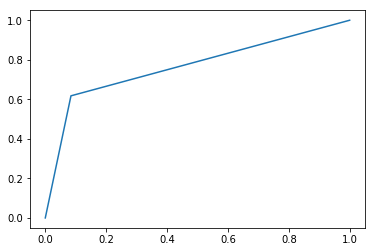

In [34]:
fpr, tpr, thresholds = roc_curve(test['Diabetes'], predictions)
mat.figure()
mat.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)

# SMOTE Analysis

In [35]:
logistic_model.coef_

array([[ 0.89186771,  2.99953596, -0.12991088,  0.83901947,  0.20510025,
         0.94628562,  1.04328377]])

In [36]:
sm = SMOTE(random_state=42)

In [37]:
X_res, y_res = sm.fit_sample(train.drop('Diabetes',axis=1),train['Diabetes'])

In [38]:
print(len((X_res)))

358


In [39]:
logistic_model_smote = linear_model.LogisticRegression()
logistic_model_smote.fit(X_res,y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
prediction_resampled=logistic_model_smote.predict(test.drop('Diabetes',axis=1))
prediction_resampled

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.])

# Performance after SMOTE Analysis

In [41]:
cm=confusion_matrix(test['Diabetes'],prediction_resampled)
cm

array([[66, 17],
       [ 8, 26]])

In [42]:
precision_recall_fscore_support(test['Diabetes'], prediction_resampled, average='macro')

(0.7482715273412948, 0.7799433026222538, 0.7580445032674332, None)

In [43]:
accuracy_score(test['Diabetes'], prediction_resampled)

0.7863247863247863

In [44]:
auc = roc_auc_score(test['Diabetes'], prediction_resampled)
auc

0.7799433026222536

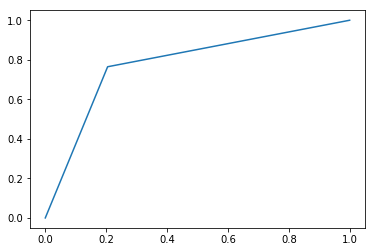

In [45]:
fpr, tpr, thresholds = roc_curve(test['Diabetes'], prediction_resampled)
mat.figure()
mat.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)